# Load dataset



Source: https://archive.ics.uci.edu/dataset/295/urban+land+cover

Dataset loaded from google drive

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

drive.mount('/content/drive')
training_df = pd.read_csv('/content/drive/MyDrive/cs375-milestone/training.csv')
testing_df = pd.read_csv('/content/drive/MyDrive/cs375-milestone/testing.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

Loading training and testing data

In [ ]:
scaler = StandardScaler()
Y_train = training_df.loc[:,'class']
X_train = scaler.fit_transform(training_df.drop(columns=['class']))
Y_test = testing_df.loc[:,'class']

[4]
X_test = scaler.fit_transform(testing_df.drop(columns=['class']))

Since the dimensionality of the data is large, we use PCA to reduce the dimensions.

In [ ]:
def applyPCA(X_train, X_test, n):
  pca = PCA(n_components=n)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  return X_train_pca, X_test_pca

# Feature Engineering

In [ ]:
training_df

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,car,1.43,39,1.41,234.03,1.54,1.60,206.36,246.05,249.69,...,55.92,1.73,0.65,0.81,7.05,1.89,0.42,-0.10,66,2469.69
164,soil,1.92,141,1.24,215.19,2.02,2.02,212.28,216.28,217.00,...,18.91,3.49,0.88,0.67,7.88,1.44,0.82,0.06,990,824.01
165,grass,2.97,252,1.73,164.13,3.20,3.09,184.15,152.03,156.22,...,33.52,2.02,0.86,0.71,8.50,1.82,0.54,0.06,948,821.84
166,grass,1.57,216,1.27,164.84,1.71,1.97,192.55,148.34,153.62,...,24.49,1.13,0.76,0.85,7.75,2.11,0.30,0.09,254,1580.72


# Model

## KNN

Accuracy for k=2: 0.6805
Accuracy for k=3: 0.7022
Accuracy for k=4: 0.6943
Accuracy for k=5: 0.7140
Accuracy for k=6: 0.7081
Accuracy for k=7: 0.7318
Accuracy for k=8: 0.7179
Accuracy for k=9: 0.7199
Accuracy for k=10: 0.7377
Accuracy for k=11: 0.7377
Accuracy for k=12: 0.7436
Accuracy for k=13: 0.7396
Accuracy for k=14: 0.7416
Accuracy for k=15: 0.7456
Accuracy for k=16: 0.7475
Accuracy for k=17: 0.7416
Accuracy for k=18: 0.7337
Accuracy for k=19: 0.7396
Accuracy for k=20: 0.7396
Accuracy for k=21: 0.7416
Accuracy for k=22: 0.7396
Accuracy for k=23: 0.7278
Accuracy for k=24: 0.7357
Accuracy for k=25: 0.7278


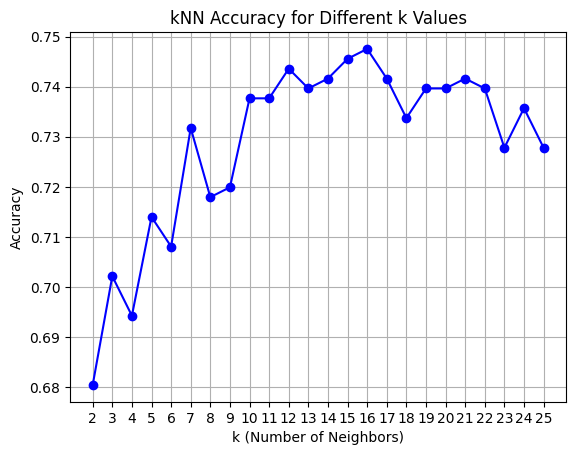

In [ ]:
# KNN
accuracies = []
k_Range = range(2, 26)
for k in k_Range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    accuracies.append(acc)
    print(f"Accuracy for k={k}: {acc:.4f}")

plt.plot(k_Range, accuracies, marker='o', linestyle='-', color='b')
plt.title('kNN Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_Range)
plt.grid()
plt.show()

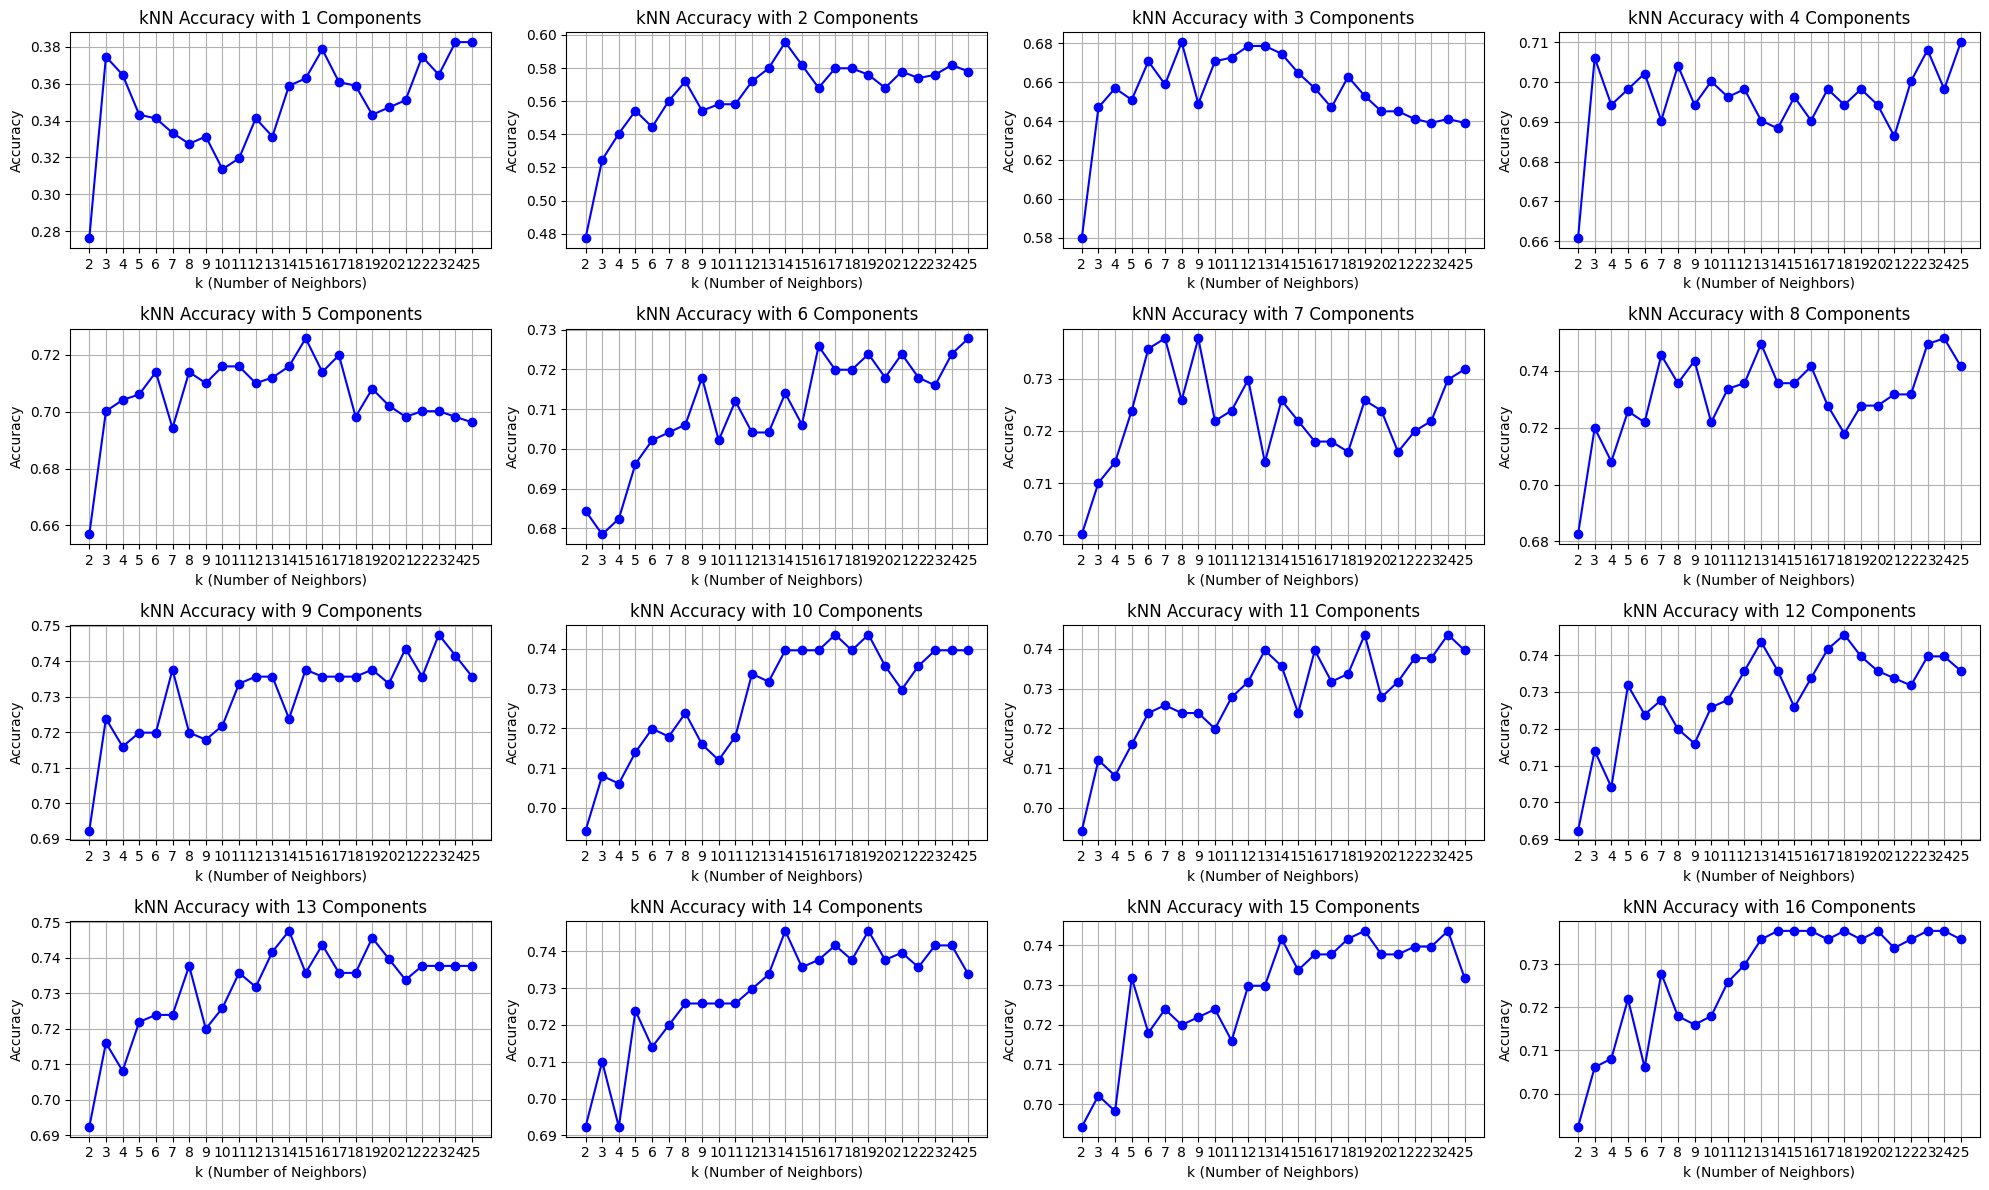

In [ ]:
# KNN

fig, axes = plt.subplots(4, 4, figsize=(20, 12))

for i in range(16):
  X_train_pca, X_test_pca = applyPCA(X_train, X_test, i+1)
  accuracies = []
  k_Range = range(2, 26)
  for k in k_Range:
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train_pca, Y_train)
      Y_pred = knn.predict(X_test_pca)
      acc = accuracy_score(Y_test, Y_pred)
      accuracies.append(acc)

  x, y = i % 4, i // 4
  axes[y, x].plot(k_Range, accuracies, marker='o', linestyle='-', color='b')
  axes[y, x].set_title(f'kNN Accuracy with {i+1} Components')
  axes[y, x].set_xlabel('k (Number of Neighbors)')
  axes[y, x].set_ylabel('Accuracy')
  axes[y, x].set_xticks(k_Range)
  axes[y, x].grid()

plt.tight_layout()
plt.show()

## Decision Trees

Decision Tree Accuracy: 0.7199
Random Forest Accuracy with 10 trees: 0.7890
Random Forest Accuracy with 15 trees: 0.7850
Random Forest Accuracy with 20 trees: 0.8166
Random Forest Accuracy with 25 trees: 0.8087
Random Forest Accuracy with 30 trees: 0.8107
Random Forest Accuracy with 35 trees: 0.8205
Random Forest Accuracy with 40 trees: 0.8185
Random Forest Accuracy with 45 trees: 0.8166
Random Forest Accuracy with 50 trees: 0.8225
Random Forest Accuracy with 55 trees: 0.8205
Random Forest Accuracy with 60 trees: 0.8185
Random Forest Accuracy with 65 trees: 0.8107
Random Forest Accuracy with 70 trees: 0.8185
Random Forest Accuracy with 75 trees: 0.8107
Random Forest Accuracy with 80 trees: 0.8087
Random Forest Accuracy with 85 trees: 0.8126
Random Forest Accuracy with 90 trees: 0.8107
Random Forest Accuracy with 95 trees: 0.8067
Random Forest Accuracy with 100 trees: 0.8047
Random Forest Accuracy with 105 trees: 0.8047
Random Forest Accuracy with 110 trees: 0.8107
Random Forest Accurac

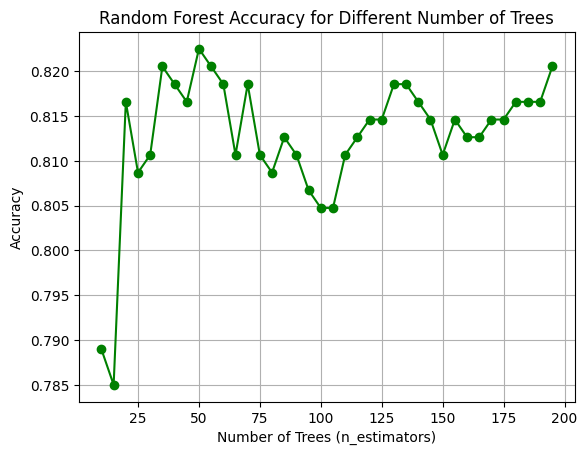

In [ ]:
# Decision Trees
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
Y_Predicted_Decision_Tree = dt.predict(X_test)
dt_accuracy = accuracy_score(Y_test, Y_Predicted_Decision_Tree)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Random Forests
n_trees = range(10, 200, 5)
Random_Forest_Accuracies = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, Y_train)
    Y_Predicted_Random_Forests = rf.predict(X_test)
    acc = accuracy_score(Y_test, Y_Predicted_Random_Forests)
    Random_Forest_Accuracies.append(acc)
    print(f"Random Forest Accuracy with {n} trees: {acc:.4f}")

import matplotlib.pyplot as plt

plt.plot(n_trees, Random_Forest_Accuracies, marker='o', linestyle='-', color='g')
plt.title('Random Forest Accuracy for Different Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Decision Tree Accuracy: 1 0.3097
Decision Tree Accuracy: 2 0.4517
Decision Tree Accuracy: 3 0.5542
Decision Tree Accuracy: 4 0.6391
Decision Tree Accuracy: 5 0.6430
Decision Tree Accuracy: 6 0.6272
Decision Tree Accuracy: 7 0.6509
Decision Tree Accuracy: 8 0.6193
Decision Tree Accuracy: 9 0.6213
Decision Tree Accuracy: 10 0.6095
Decision Tree Accuracy: 11 0.6174
Decision Tree Accuracy: 12 0.5976
Decision Tree Accuracy: 13 0.6075
Decision Tree Accuracy: 14 0.5937
Decision Tree Accuracy: 15 0.6292
Decision Tree Accuracy: 16 0.6174


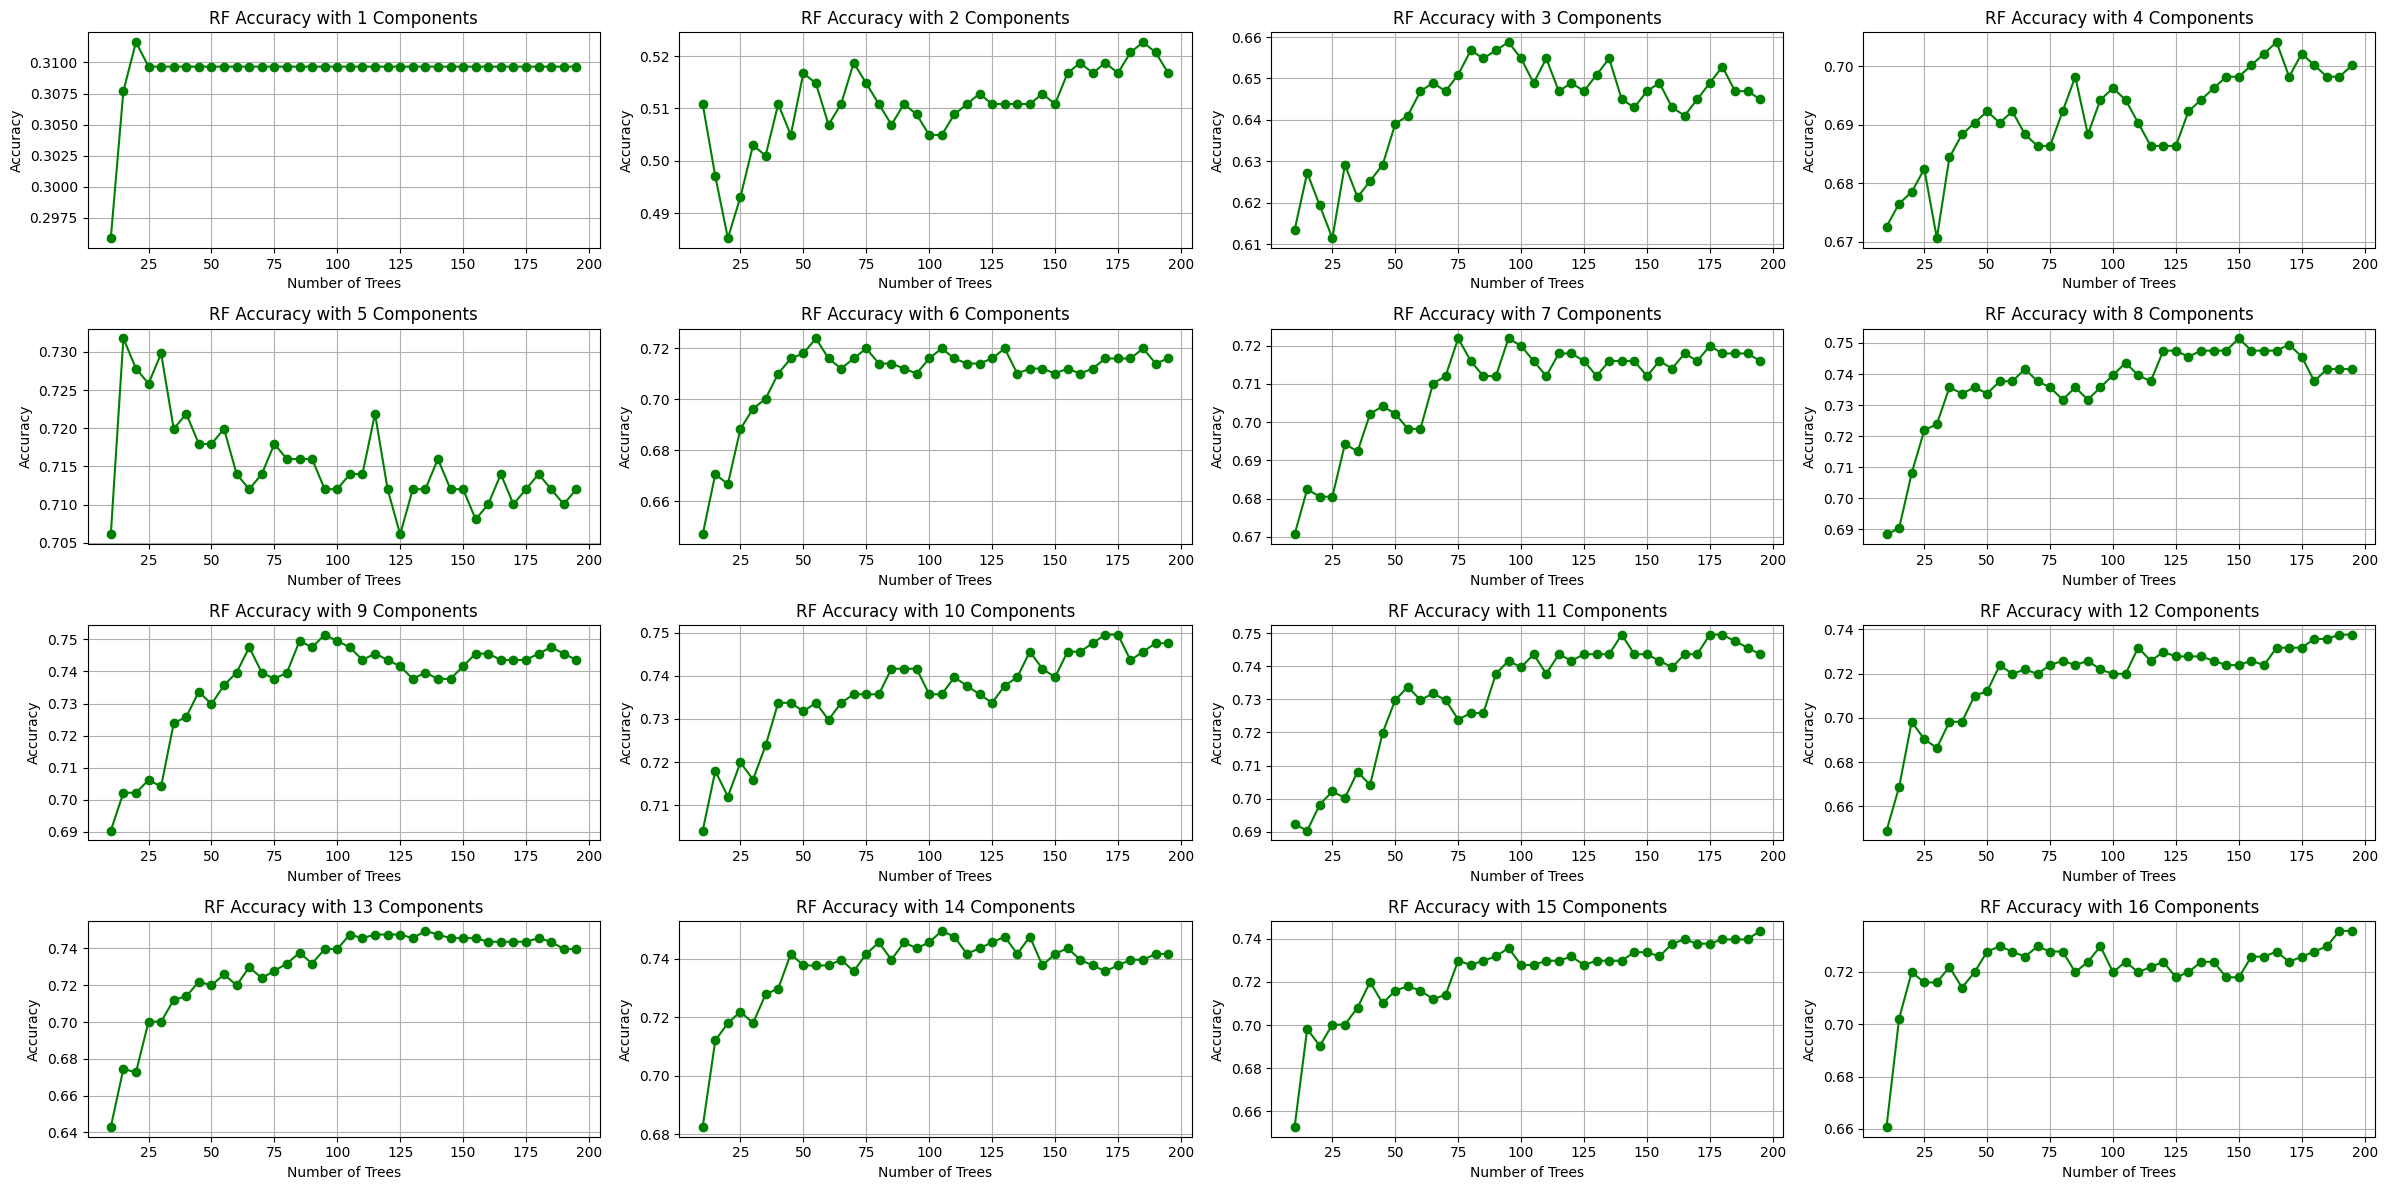

In [ ]:
# Random Forests

fig, axes = plt.subplots(4, 4, figsize=(24, 12))

for i in range(16):
  X_train_pca, X_test_pca = applyPCA(X_train, X_test, i+1)

  dt = DecisionTreeClassifier(random_state=42)
  dt.fit(X_train_pca, Y_train)
  Y_Predicted_Decision_Tree = dt.predict(X_test_pca)
  dt_accuracy = accuracy_score(Y_test, Y_Predicted_Decision_Tree)
  print(f"Decision Tree Accuracy: {i+1} {dt_accuracy:.4f}")

  n_trees = range(10, 200, 5)
  Random_Forest_Accuracies = []

  for n in n_trees:
      rf = RandomForestClassifier(n_estimators=n, random_state=42)
      rf.fit(X_train_pca, Y_train)
      Y_Predicted_Random_Forests = rf.predict(X_test_pca)
      acc = accuracy_score(Y_test, Y_Predicted_Random_Forests)
      Random_Forest_Accuracies.append(acc)

  x, y = i % 4, i // 4
  axes[y, x].plot(n_trees, Random_Forest_Accuracies, marker='o', linestyle='-', color='g')
  axes[y, x].set_title(f'RF Accuracy with {i+1} Components')
  axes[y, x].set_xlabel('Number of Trees')
  axes[y, x].set_ylabel('Accuracy')
  axes[y, x].grid()

plt.tight_layout()
plt.show()

## Naive Bayes

Naive Bayes Accuracy with 2-fold cross-validation: 0.7500
Naive Bayes Accuracy with 3-fold cross-validation: 0.7976
Naive Bayes Accuracy with 4-fold cross-validation: 0.7976
Naive Bayes Accuracy with 5-fold cross-validation: 0.8096
Naive Bayes Accuracy with 6-fold cross-validation: 0.7976
Naive Bayes Accuracy with 7-fold cross-validation: 0.7857
Naive Bayes Accuracy with 8-fold cross-validation: 0.7976
Naive Bayes Accuracy with 9-fold cross-validation: 0.7969
Naive Bayes Accuracy with 10-fold cross-validation: 0.8088
Naive Bayes Accuracy with 11-fold cross-validation: 0.7970
Naive Bayes Accuracy with 12-fold cross-validation: 0.8036
Naive Bayes Accuracy with 13-fold cross-validation: 0.8097
Naive Bayes Accuracy with 14-fold cross-validation: 0.8036


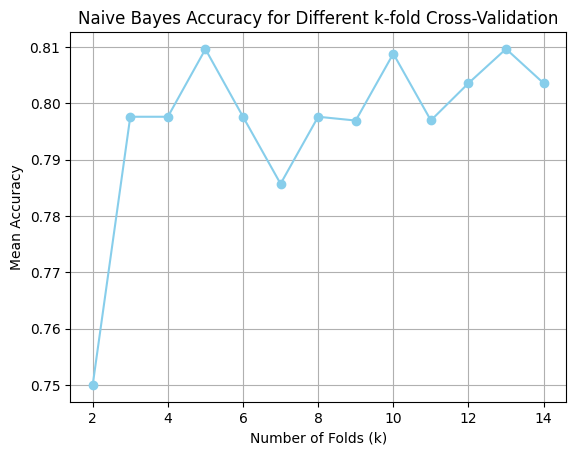

In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
nb_accuracy = accuracy_score(Y_test, Y_pred_nb)

k_range = range(2, 15)

cv_accuracies = []

for k in k_range:
    nb = GaussianNB()
    cv_score = cross_val_score(nb, X_train, Y_train, cv=k, scoring='accuracy')
    cv_accuracies.append(cv_score.mean())
    print(f"Naive Bayes Accuracy with {k}-fold cross-validation: {cv_score.mean():.4f}")

plt.plot(k_range, cv_accuracies, marker='o', linestyle='-', color='skyblue')
plt.title('Naive Bayes Accuracy for Different k-fold Cross-Validation')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Accuracy')
plt.grid()
plt.show()



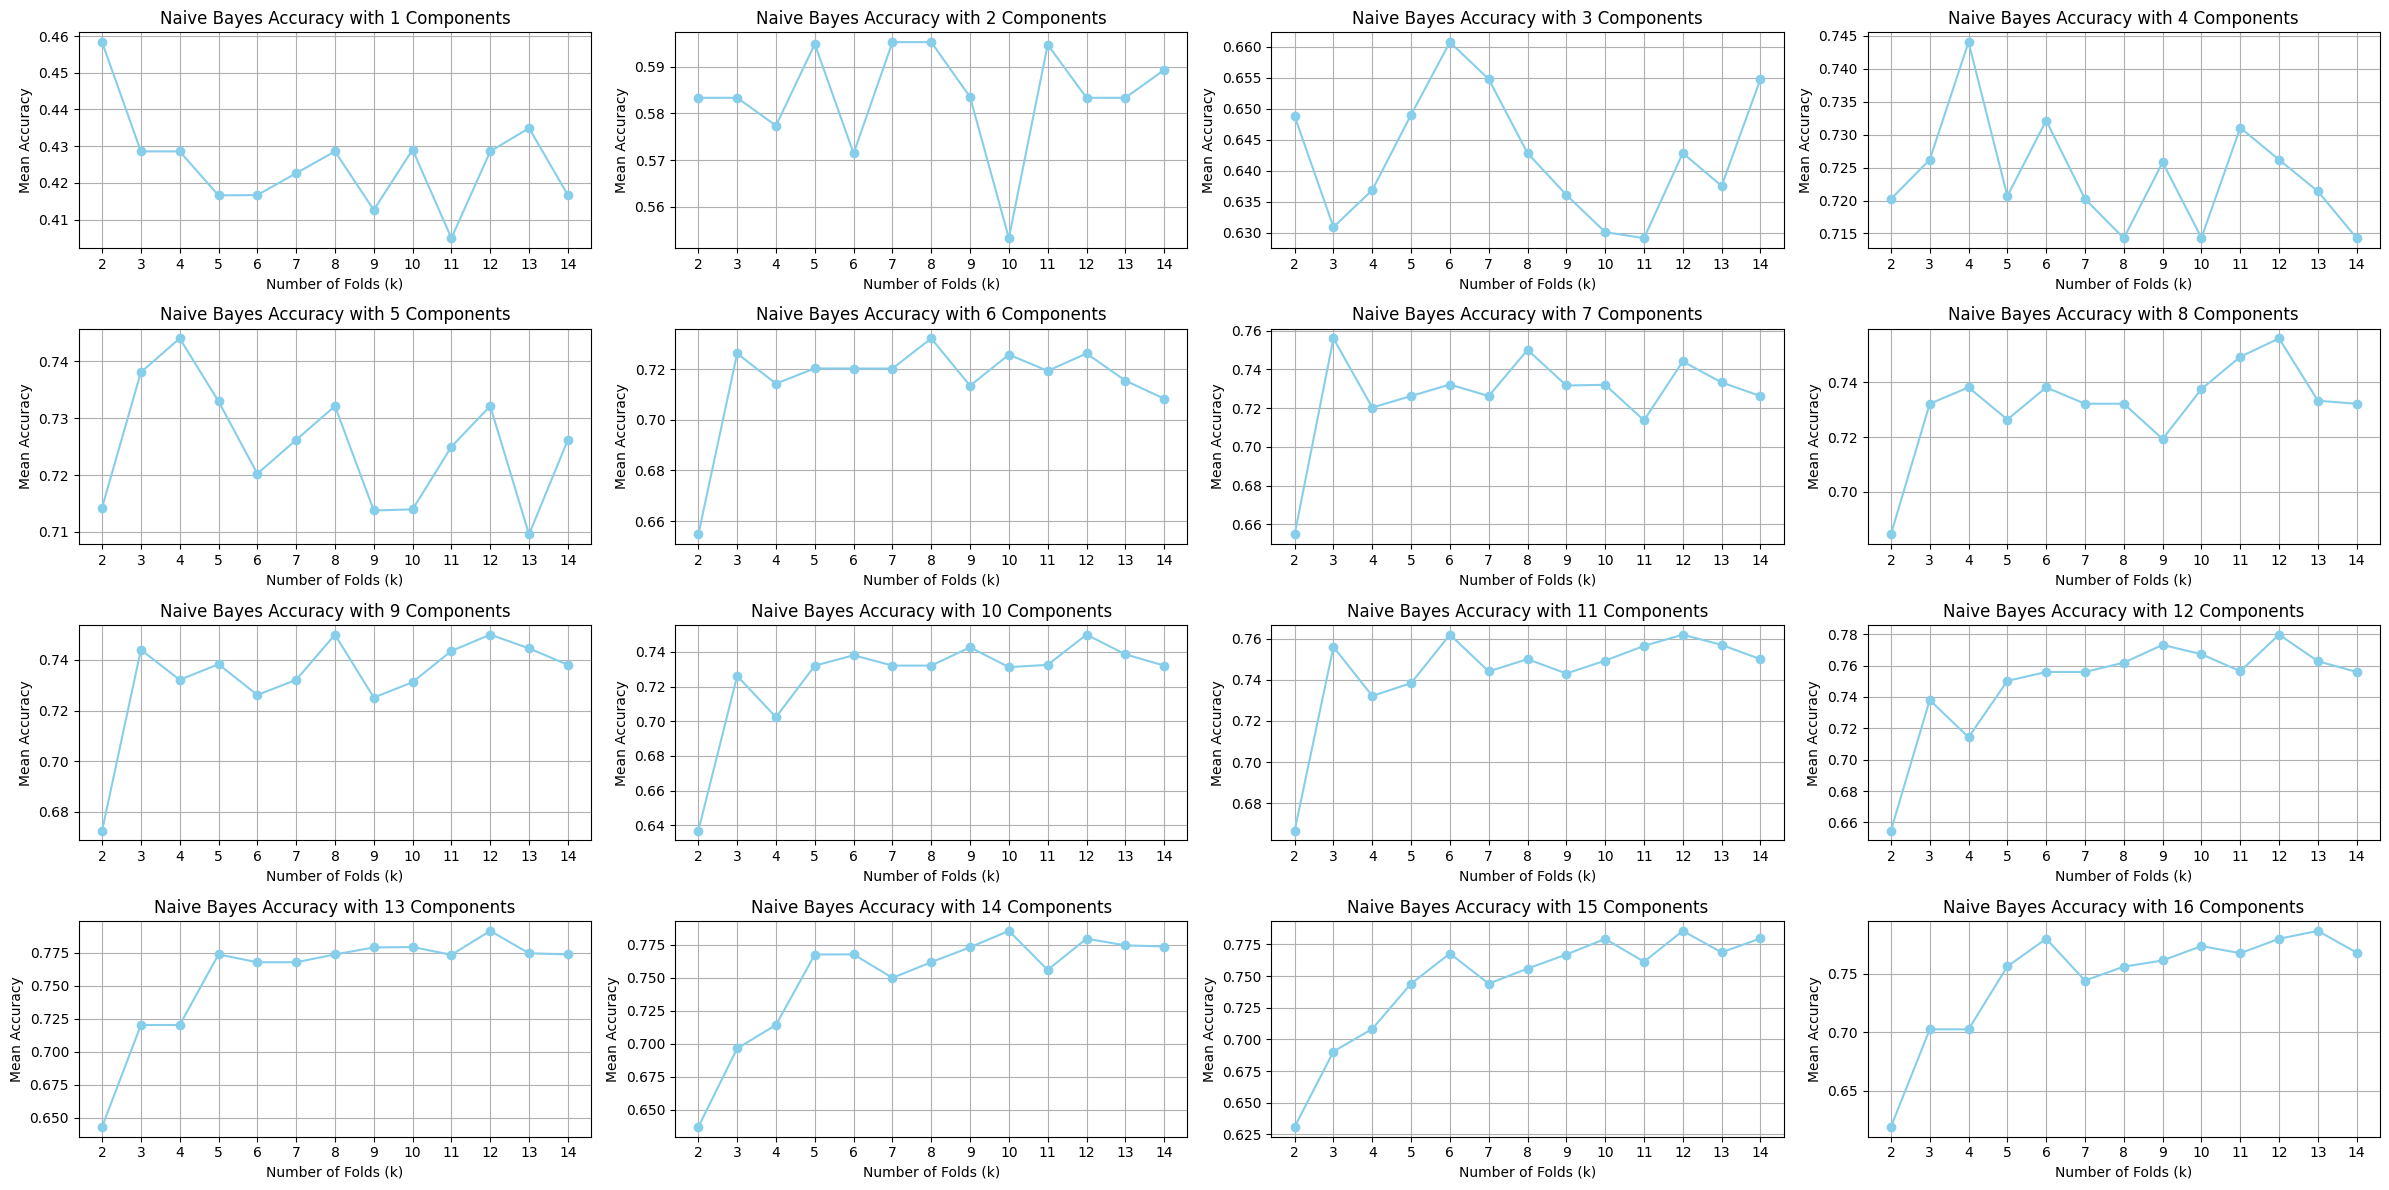

In [ ]:
# Naive Bayes

fig, axes = plt.subplots(4, 4, figsize=(24, 12))

for i in range(16):
  X_train_pca, X_test_pca = applyPCA(X_train, X_test, i+1)

  nb = GaussianNB()
  nb.fit(X_train_pca, Y_train)
  Y_pred_nb = nb.predict(X_test_pca)
  nb_accuracy = accuracy_score(Y_test, Y_pred_nb)

  k_range = range(2, 15)

  cv_accuracies = []

  for k in k_range:
    nb = GaussianNB()
    cv_score = cross_val_score(nb, X_train_pca, Y_train, cv=k, scoring='accuracy')
    cv_accuracies.append(cv_score.mean())

  x, y = i % 4, i // 4
  axes[y, x].plot(k_range, cv_accuracies, marker='o', linestyle='-', color='skyblue')
  axes[y, x].set_title(f'Naive Bayes Accuracy with {i+1} Components')
  axes[y, x].set_xlabel('Number of Folds (k)')
  axes[y, x].set_ylabel('Mean Accuracy')
  axes[y, x].set_xticks(k_range)
  axes[y, x].grid()

plt.tight_layout()
plt.show()

## Neural Network

Neural Network Accuracy with 10 hidden units: 0.6963
Neural Network Accuracy with 20 hidden units: 0.7396
Neural Network Accuracy with 30 hidden units: 0.7199
Neural Network Accuracy with 40 hidden units: 0.7160
Neural Network Accuracy with 50 hidden units: 0.7298
Neural Network Accuracy with 60 hidden units: 0.7239
Neural Network Accuracy with 70 hidden units: 0.7456
Neural Network Accuracy with 80 hidden units: 0.7258
Neural Network Accuracy with 90 hidden units: 0.7357
Neural Network Accuracy with 100 hidden units: 0.7318
Neural Network Accuracy with 110 hidden units: 0.7475
Neural Network Accuracy with 120 hidden units: 0.7258
Neural Network Accuracy with 130 hidden units: 0.7377
Neural Network Accuracy with 140 hidden units: 0.7495
Neural Network Accuracy with 150 hidden units: 0.7456
Neural Network Accuracy with 160 hidden units: 0.7298
Neural Network Accuracy with 170 hidden units: 0.7298
Neural Network Accuracy with 180 hidden units: 0.7396
Neural Network Accuracy with 190 hidd

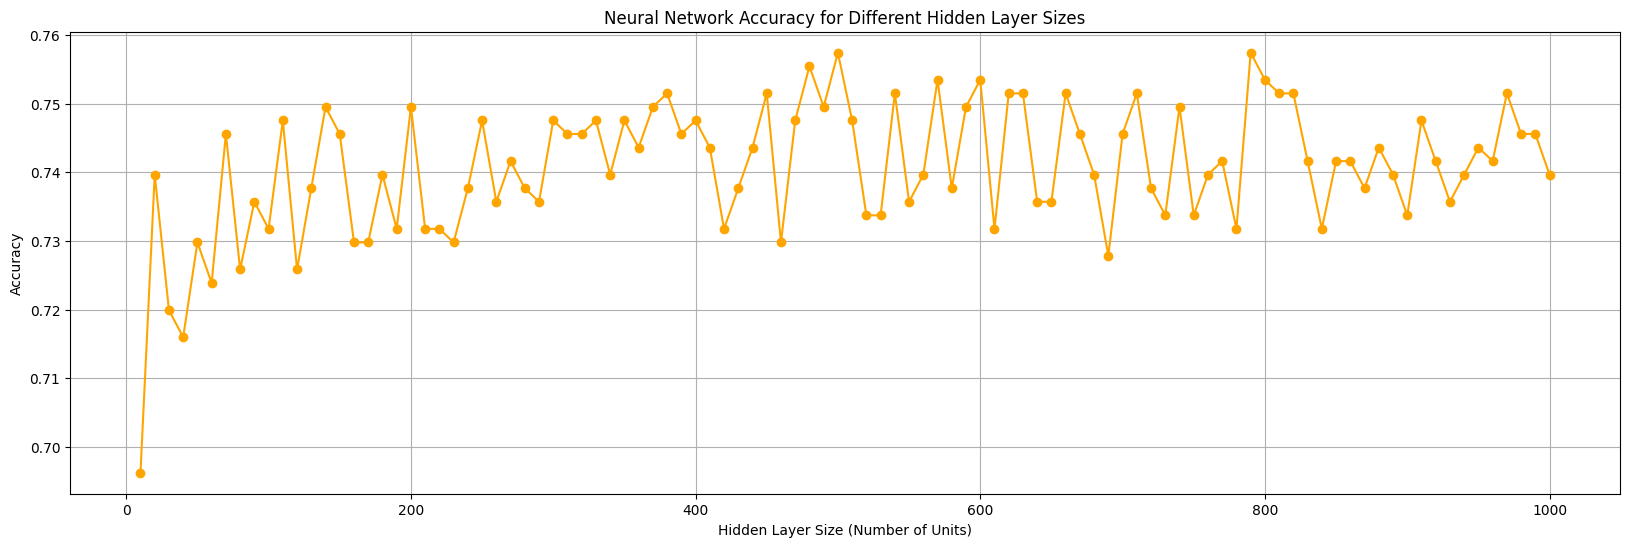

In [ ]:
# Neural Network
hidden_layer_sizes_range = [(i,) for i in range(10, 1001, 10)]
nn_accuracies = []

for hl_size in hidden_layer_sizes_range:
    nn = MLPClassifier(hidden_layer_sizes=hl_size, max_iter=800, random_state=42)
    nn.fit(X_train, Y_train)
    Y_pred_nn = nn.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred_nn)
    nn_accuracies.append(acc)
    print(f"Neural Network Accuracy with {hl_size[0]} hidden units: {acc:.4f}")

hidden_units = [hl[0] for hl in hidden_layer_sizes_range]
plt.figure(figsize=(20,6))
plt.plot(hidden_units, nn_accuracies, marker='o', linestyle='-', color='orange')
plt.title('Neural Network Accuracy for Different Hidden Layer Sizes')
plt.xlabel('Hidden Layer Size (Number of Units)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
# Neural Network

fig, axes = plt.subplots(4, 4, figsize=(20, 12))
hidden_layer_sizes_range = [(10,), (20,), (30,), (40,), (50,), (60,), (70,), (80,), (90,), (100,), (110,), (120,), (130,), (140,), (150,), (160,), (170,), (180,), (190,), (200,), (210,), (220,), (230,), (240,), (250,), (260,), (270,), (280,), (290,), (300,)]


for i in range(16):
  X_train_pca, X_test_pca = applyPCA(X_train, X_test, i+1)

  nn_accuracies = []

  for hl_size in hidden_layer_sizes_range:
    nn = MLPClassifier(hidden_layer_sizes=hl_size, max_iter=800, random_state=42)
    nn.fit(X_train_pca, Y_train)
    Y_pred_nn = nn.predict(X_test_pca)
    acc = accuracy_score(Y_test, Y_pred_nn)
    nn_accuracies.append(acc)

  hidden_units = [hl[0] for hl in hidden_layer_sizes_range]
  x, y = i % 4, i // 4
  axes[y, x].plot(hidden_units, nn_accuracies, marker='o', linestyle='-', color='skyblue')
  axes[y, x].set_title(f'Neural Network Accuracy with {i+1} Components')
  axes[y, x].set_xlabel('Hidden Layer Size (Number of Units)')
  axes[y, x].set_ylabel('Accuracy')
  axes[y, x].grid()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

# Evaluation Metrics

*Explain stuff here*

In [ ]:
# KNN Evaluation
for k in k_Range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    print(f"Evaluation for KNN with k={k}:")
    print(classification_report(Y_test, Y_pred_knn))
    print(confusion_matrix(Y_test, Y_pred_knn))
    print("-" * 50)

# Decision Trees Evaluation
print("Evaluation for Decision Tree:")
print(classification_report(Y_test, Y_Predicted_Decision_Tree))
print(confusion_matrix(Y_test, Y_Predicted_Decision_Tree))
print("-" * 50)

# Random Forest Evaluation for different numbers of trees
for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, Y_train)
    Y_Predicted_Random_Forests = rf.predict(X_test)
    print(f"Evaluation for Random Forest with {n} trees:")
    print(classification_report(Y_test, Y_Predicted_Random_Forests))
    print(confusion_matrix(Y_test, Y_Predicted_Random_Forests))
    print("-" * 50)

# Random Forest Evaluation
for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, Y_train)
    Y_Predicted_Random_Forests = rf.predict(X_test)
    print(f"Evaluation for Random Forest with {n} trees:")
    print(classification_report(Y_test, Y_Predicted_Random_Forests))
    print(confusion_matrix(Y_test, Y_Predicted_Random_Forests))
    print("-" * 50)

Evaluation for KNN with k=2:
              precision    recall  f1-score   support

    asphalt        0.69      0.82      0.75        45
   building        0.72      0.79      0.75        97
        car        0.86      0.90      0.88        21
   concrete        0.71      0.72      0.71        93
      grass        0.60      0.71      0.65        83
       pool        0.69      0.79      0.73        14
     shadow        0.62      0.56      0.59        45
       soil        0.12      0.10      0.11        20
       tree        0.84      0.54      0.66        89

    accuracy                           0.68       507
   macro avg       0.65      0.66      0.65       507
weighted avg       0.69      0.68      0.68       507

[[37  1  0  1  1  0  5  0  0]
 [ 2 77  1 15  0  1  0  1  0]
 [ 0  1 19  0  0  0  0  1  0]
 [ 0 12  1 67  1  0  0 11  1]
 [ 0  5  0  7 59  0  2  2  8]
 [ 0  2  0  0  1 11  0  0  0]
 [14  2  0  0  0  4 25  0  0]
 [ 0  7  1  5  5  0  0  2  0]
 [ 1  0  0  0 32  0  8  0 

In [ ]:
# Naive Bayes with Cross-Validation Evaluation
for k in k_range:
    nb = GaussianNB()
    cv_score = cross_val_score(nb, X_train, Y_train, cv=k, scoring='accuracy')
    print(f"Naive Bayes Accuracy with {k}-fold cross-validation: {cv_score.mean():.4f}")

    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X_train, Y_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        Y_train_cv, Y_test_cv = Y_train[train_index], Y_train[test_index]

        nb.fit(X_train_cv, Y_train_cv)
        Y_pred_cv = nb.predict(X_test_cv)

        print(f"Evaluation for fold with {k}-fold cross-validation:")
        print(classification_report(Y_test_cv, Y_pred_cv, zero_division=1))
        print(confusion_matrix(Y_test_cv, Y_pred_cv))
        print("-" * 50)

# Neural Network Evaluation
for hl_size in hidden_layer_sizes_range:
    nn = MLPClassifier(hidden_layer_sizes=hl_size, max_iter=800, random_state=42)
    nn.fit(X_train, Y_train)
    Y_pred_nn = nn.predict(X_test)
    print(f"Evaluation for Neural Network with {hl_size[0]} hidden units:")
    print(classification_report(Y_test, Y_pred_nn))
    print(confusion_matrix(Y_test, Y_pred_nn))
    print("-" * 50)

Streaming output truncated to the last 5000 lines.
    asphalt        1.00      1.00      1.00         2
   building        1.00      0.75      0.86         4
        car        0.67      1.00      0.80         2
   concrete        1.00      0.75      0.86         4
      grass        0.80      0.80      0.80         5
       pool        1.00      0.67      0.80         3
     shadow        1.00      0.67      0.80         3
       soil        0.50      0.50      0.50         2
       tree        0.50      1.00      0.67         3

    accuracy                           0.79        28
   macro avg       0.83      0.79      0.79        28
weighted avg       0.85      0.79      0.79        28

[[2 0 0 0 0 0 0 0 0]
 [0 3 1 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 1 0]
 [0 0 0 0 4 0 0 0 1]
 [0 0 0 0 0 2 0 0 1]
 [0 0 0 0 0 0 2 0 1]
 [0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 3]]
--------------------------------------------------
Naive Bayes Accuracy with 7-fold cross-validation: 0.7857


In [ ]:
# Function to evaluate and store metrics for each model
def evaluate_model(name, model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    print(f"Evaluation for {name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(Y_test, Y_pred, zero_division=1))
    print(confusion_matrix(Y_test, Y_pred))
    print("-" * 50)
    return {"model": name, "accuracy": acc, "f1_score": f1}

# Store metrics for comparison
metrics = []

# KNN
best_knn_k = None
best_knn_acc = 0
k_range = range(2, 26)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    acc = accuracy_score(Y_test, knn.predict(X_test))
    if acc > best_knn_acc:
        best_knn_acc = acc
        best_knn_k = k
metrics.append(evaluate_model(f"KNN (k={best_knn_k})", KNeighborsClassifier(n_neighbors=best_knn_k), X_train, Y_train, X_test, Y_test))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
metrics.append(evaluate_model("Decision Tree", dt, X_train, Y_train, X_test, Y_test))

# Random Forest
best_rf_n = None
best_rf_acc = 0
n_trees = range(10, 200, 10)
for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, Y_train)
    acc = accuracy_score(Y_test, rf.predict(X_test))
    if acc > best_rf_acc:
        best_rf_acc = acc
        best_rf_n = n
metrics.append(evaluate_model(f"Random Forest (n_estimators={best_rf_n})", RandomForestClassifier(n_estimators=best_rf_n, random_state=42), X_train, Y_train, X_test, Y_test))

# Naive Bayes
nb = GaussianNB()
metrics.append(evaluate_model("Naive Bayes", nb, X_train, Y_train, X_test, Y_test))

# Neural Network
best_nn_units = None
best_nn_acc = 0
hidden_layer_sizes_range = [(i,) for i in range(10, 201, 20)]
for hl_size in hidden_layer_sizes_range:
    nn = MLPClassifier(hidden_layer_sizes=hl_size, max_iter=800, random_state=42)
    nn.fit(X_train, Y_train)
    acc = accuracy_score(Y_test, nn.predict(X_test))
    if acc > best_nn_acc:
        best_nn_acc = acc
        best_nn_units = hl_size[0]
metrics.append(evaluate_model(f"Neural Network (hidden_units={best_nn_units})", MLPClassifier(hidden_layer_sizes=(best_nn_units,), max_iter=800, random_state=42), X_train, Y_train, X_test, Y_test))

# Print Best Model
best_model = max(metrics, key=lambda x: x["accuracy"])
print(f"\nBest Model: {best_model['model']}")
print(f"Accuracy: {best_model['accuracy']:.4f}")
print(f"F1 Score: {best_model['f1_score']:.4f}")

Evaluation for KNN (k=16):
Accuracy: 0.7475
F1 Score: 0.7480
              precision    recall  f1-score   support

    asphalt        0.77      0.80      0.78        45
   building        0.80      0.82      0.81        97
        car        0.93      0.67      0.78        21
   concrete        0.80      0.72      0.76        93
      grass        0.72      0.75      0.73        83
       pool        0.63      0.86      0.73        14
     shadow        0.72      0.69      0.70        45
       soil        0.19      0.20      0.20        20
       tree        0.79      0.82      0.81        89

    accuracy                           0.75       507
   macro avg       0.71      0.70      0.70       507
weighted avg       0.75      0.75      0.75       507

[[36  0  0  0  0  0  6  1  2]
 [ 1 80  0  9  0  1  2  4  0]
 [ 0  1 14  0  1  3  0  1  1]
 [ 0 14  1 67  1  0  0  9  1]
 [ 0  2  0  3 62  0  0  2 14]
 [ 0  1  0  0  1 12  0  0  0]
 [10  0  0  0  0  3 31  0  1]
 [ 0  2  0  5  9  0  0  